TWEET ANALYZER

This script utilizes Tweepy and VADER analysis to gage the average sentiments of five major news outlets over their last 100 tweets.

OBSERVATIONS:

- CBS showed a consistently more positive sentiment in their tweets.

- CNN and Fox, networks that are both seen as politically partisaned, showed the most negative average sentiments.

- The New York Times was interpreted as most neutral with average sentiment compound of -.02.

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
papers = ['nytimes','cbs','bbc','foxnews','cnn']

In [31]:
# public_tweets = api.search(target, count=100, result_type="recent", max_id=oldest_tweet)
cnn_compounds = []
fox_compounds = []
nyt_compounds = []
cbs_compounds = []
bbc_compounds = []
compounds = []
positives = []
negatives = []
neutrals = []
texts = []
created_at = []
news_names = []

for paper in papers:
    for x in range(5):
        ny_tweets = api.user_timeline(paper, page=x+1)
        for tweet in ny_tweets:
                results = analyzer.polarity_scores(tweet["text"])
                if tweet['user']['screen_name'] == 'FoxNews':
                    fox_compounds.append(results['compound'])
                elif tweet['user']['screen_name'] == 'CNN':
                    cnn_compounds.append(results['compound'])
                elif tweet['user']['screen_name'] == 'BBC':
                    bbc_compounds.append(results['compound'])
                elif tweet['user']['screen_name'] == 'CBS':
                    cbs_compounds.append(results['compound'])
                elif tweet['user']['screen_name'] == 'nytimes':
                    nyt_compounds.append(results['compound'])
                compounds.append(results['compound'])
                positives.append(results['pos'])
                negatives.append(results['neg'])
                neutrals.append(results['pos'])
                texts.append(tweet['text'])
                created_at.append(tweet['created_at'])
                news_names.append(tweet['user']['name'])

In [38]:
news_tweets_df = pd.DataFrame({
    'News Account':news_names,
    'Tweet':texts,
    'Tweet Date':created_at,
    'VADER Compound':compounds,
    'VADER Positive':positives,
    'VADER Negative':negatives,
    'VADER Neutral':neutrals
})

news_tweets_df.to_csv('news_tweets_summary.csv')

news_tweets_df.head()


,News Account,Tweet,Tweet Date,VADER Compound,VADER Negative,VADER Neutral,VADER Positive
0,The New York Times,This video is the first piece in a series abou...,Mon Mar 19 19:02:38 +0000 2018,0.0000,0.000,0.000,0.000
1,The New York Times,"In the 6 months since Harvey, The New York Tim...",Mon Mar 19 19:01:46 +0000 2018,0.0000,0.000,0.000,0.000
2,The New York Times,The homes in Cinco Ranch sat on land that had ...,Mon Mar 19 19:00:57 +0000 2018,0.0000,0.000,0.000,0.000
3,The New York Times,"After Hurricane Harvey swamped Houston, some r...",Mon Mar 19 19:00:10 +0000 2018,-0.3182,0.113,0.000,0.000
4,The New York Times,"RT @tiffkhsu: Claire's, where I and all of my ...",Mon Mar 19 18:50:06 +0000 2018,0.7351,0.000,0.212,0.212


This df holds a quick summary for all 500 tweets analyzed (100 per news outlet)

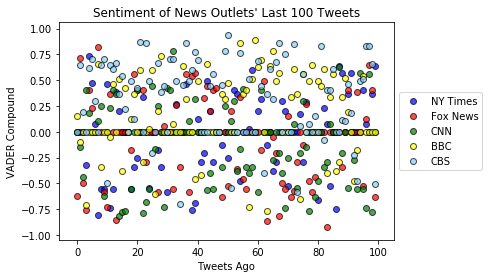

In [33]:
fig, ax = plt.subplots()
x_axis = np.arange(0,100)
ax.scatter(x_axis,nyt_compounds,color='blue',alpha=.7,edgecolor='black',label='NY Times')
ax.scatter(x_axis,fox_compounds,color='red',alpha=.7,edgecolor='black',label='Fox News')
ax.scatter(x_axis,cnn_compounds,color='green',alpha=.7,edgecolor='black',label='CNN')
ax.scatter(x_axis,bbc_compounds,color='yellow',alpha=.7,edgecolor='black',label='BBC')
ax.scatter(x_axis,cbs_compounds,color='lightskyblue',alpha=.7,edgecolor='black',label='CBS')

ax.legend(loc='center left',bbox_to_anchor=(1,.5))
plt.ylabel("VADER Compound")
plt.xlabel("Tweets Ago")
plt.title("Sentiment of News Outlets' Last 100 Tweets")
plt.savefig('news_sentiment_scatter.png')
plt.show()


In [39]:
sent_summary_df = pd.DataFrame({
    'NY Times':[np.mean(nyt_compounds)],
    'Fox News':[np.mean(fox_compounds)],
    'CNN':[np.mean(cnn_compounds)],
    'BBC':[np.mean(bbc_compounds)],
    'CBS':[np.mean(cbs_compounds)]
})

sent_summary_df.to_csv('average_news_sentiments.csv')

sent_summary_df

,BBC,CBS,CNN,Fox News,NY Times
0,0.148241,0.304366,-0.113348,-0.067737,-0.019695


This df holds the average sentiment of each source's Twitter over 100 tweets.

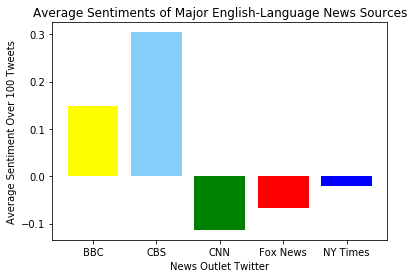

In [41]:
x_axis = np.arange(5)
tick_label = ['BBC','CBS','CNN','Fox News','NY Times']
colors = ['yellow','lightskyblue','green','red','blue']
plt.bar(x_axis, sent_summary_df.loc[0,:],color=colors)

plt.xticks(x_axis,tick_label)
plt.xlabel('News Outlet Twitter')
plt.ylabel('Average Sentiment Over 100 Tweets')
plt.title('Average Sentiments of Major English-Language News Sources')

plt.savefig('average_sentiments_bar.png')

plt.show()
